In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/regression_problem.xls')

In [4]:
df.shape

(100, 6)

In [5]:
df.head()

,Employees,Products,Clients,Turnover,Atrition,Profit
0,1567,9,15,31470.06,3.35,8147.66
1,1675,10,8,41895.10,12.78,4520.65
2,1395,5,13,32372.37,17.50,6653.68
3,1165,1,9,29595.66,5.15,3949.12
4,35,2,12,815.01,10.17,-866.69


In [6]:
df.tail()

,Employees,Products,Clients,Turnover,Atrition,Profit
95,1505,2,14,41014.26,1.54,8237.52
96,1745,19,14,44591.73,14.27,6301.21
97,571,19,3,13063.34,6.21,1410.81
98,455,10,7,13138.58,3.33,2934.55
99,728,4,11,17522.96,0.00,2084.51


In [7]:
df.dtypes

Employees      int64
Products       int64
Clients        int64
Turnover     float64
Atrition     float64
Profit       float64
dtype: object

In [8]:
df['Employees'].describe()

count     100.000000
mean     1008.500000
std       537.768181
min        32.000000
25%       560.750000
50%      1069.000000
75%      1464.000000
max      1995.000000
Name: Employees, dtype: float64

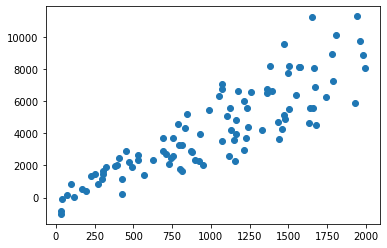

In [11]:

Employees = df['Employees']
Profit = df['Profit']

plt.scatter( Employees, Profit)

In [13]:
df.isnull().sum()

Employees    0
Products     0
Clients      0
Turnover     0
Atrition     0
Profit       0
dtype: int64

In [15]:
X = np.array(df.iloc[:,0])

In [14]:
Y = df['Profit']

In [16]:
X

array([1567, 1675, 1395, 1165,   35,  710, 1461, 1979,  689, 1153,  786,
        923, 1122, 1546,  230, 1780,  755,  300,  900,  758, 1809, 1130,
       1962,  950, 1474,  469,  424, 1225,  742, 1069, 1211,  405,  322,
        814, 1073,  306, 1433, 1172, 1473,  844,  100, 1363, 1572,  798,
       1104,  814, 1211, 1658, 1506, 1150, 1499, 1927,   69,  989,  252,
       1236,  528, 1664, 1995, 1160, 1069, 1116, 1055, 1940, 1238, 1475,
       1330,  692,  392,  880,  927, 1631, 1260, 1785, 1653,  832,  530,
        169,   32, 1440,  304, 1674,  193,  382,  491,  427,  275,  796,
       1637,  869,   38, 1383, 1361,  115,  624, 1505, 1745,  571,  455,
        728])

In [17]:
Y.shape

(100,)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train.reshape(-1,1),Y_train)

LinearRegression()

In [19]:
model.score(X_test.reshape(-1,1),Y_test)

0.5264233910645624

In [20]:
model.predict([[69]])

array([35.19832425])

In [21]:
#MULTIVARITE 
X = df.drop('Profit',axis = 'columns')
Y = df['Profit']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [22]:
model.score(X_test,Y_test)

0.6033771511297497

In [23]:
model.predict([[1637,869,38,1383,1361]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-88022.8676742])

In [24]:
model.predict([[35,2,12,815.01,10.17]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-471.26707263])

In [25]:
Y_pred = model.predict(X_test)

In [26]:
#POLYNOMIAL
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
model.fit(X_train_trans,Y_train)


LinearRegression()

In [27]:
model.score(X_test_trans,Y_test)

0.5887796470066522

In [28]:
X_train_trans[0]

array([1.00000000e+00, 3.80000000e+01, 6.00000000e+00, 9.00000000e+00,
       8.80190000e+02, 4.14000000e+00, 1.44400000e+03, 2.28000000e+02,
       3.42000000e+02, 3.34472200e+04, 1.57320000e+02, 3.60000000e+01,
       5.40000000e+01, 5.28114000e+03, 2.48400000e+01, 8.10000000e+01,
       7.92171000e+03, 3.72600000e+01, 7.74734436e+05, 3.64398660e+03,
       1.71396000e+01])

In [29]:
model.predict([[1.00000000e+00, 3.80000000e+01, 6.00000000e+00, 9.00000000e+00,
       8.80190000e+02, 4.14000000e+00, 1.44400000e+03, 2.28000000e+02,
       3.42000000e+02, 3.34472200e+04, 1.57320000e+02, 3.60000000e+01,
       5.40000000e+01, 5.28114000e+03, 2.48400000e+01, 8.10000000e+01,
       7.92171000e+03, 3.72600000e+01, 7.74734436e+05, 3.64398660e+03,
       1.71396000e+01]])

array([87.12912052])

In [30]:
Y_train[0]

8147.66